# Data Acquisition

from Google Drive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#  download dataset.
download = drive.CreateFile({'id': '1NC0VFXVyU5_imbnXUY0Cm_6vvshShU-w'})
download.GetContentFile('speed.zip')
print('downloaded file with ID {}'.format(download.get('id')))

download2 = drive.CreateFile({"id": "1GzeCeyMQJxe0ZPWESJcBdrvTIxZLQVt6"})
download2.GetContentFile("utils.zip")
print('downloaded file with ID {}'.format(download2.get('id')))


    100% |████████████████████████████████| 993kB 24.4MB/s 
downloaded file with ID 1NC0VFXVyU5_imbnXUY0Cm_6vvshShU-w


In [0]:
# Unzip data and utils
!unzip -q speed.zip
!unzip -q utils.zip


# Dataset Viewer

In [0]:
from matplotlib import pyplot as plt
from random import randint
from utils2 import *
import inspect


Let's set up the path to a local copy of the SPEED dataset, and instanciate the helper class.

In [0]:
dataset_root_dir = '../content/speed/'
dataset = SatellitePoseEstimationDataset(root_dir=dataset_root_dir)

First we show a number of random images from the dataset.

In [0]:
import numpy as np
import pandas as pd
import random

def get_estimations(submission_dir="submission_pytorch_example.csv", img_file=None):
  qr1 = pd.read_csv(submission_dir, header=None)
  # get only synthetic images
  synthimage_files = list(qr1[0].loc[qr1[0].apply(len) <= 13].values)
  #random choice from synthetic test 
  img_file= random.choice(synthimage_files)
  _qr = qr1.loc[qr1[0] == img_file]
  qr = (list (*_qr.loc[:,1:4].values), list(*_qr.loc[:,5:].values))
  
  return {"img_file":img_file ,"qr":qr }



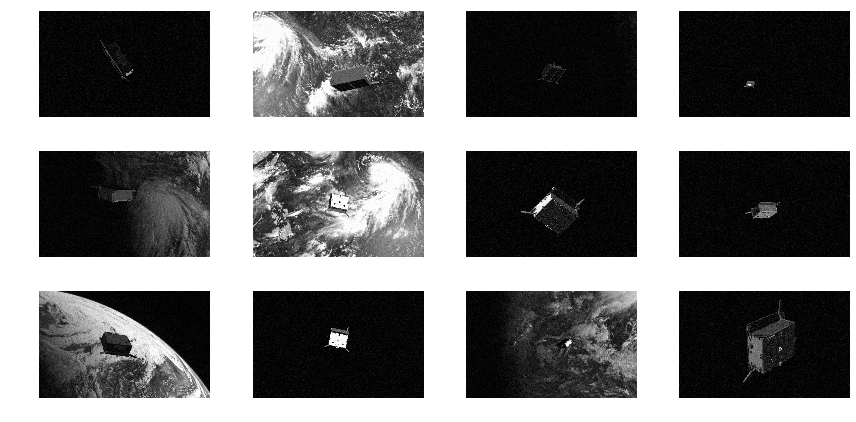

In [0]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i in range(rows):
    for j in range(cols):
        img = dataset.get_image(randint(0, 12000))
        axes[i][j].imshow(img)
        axes[i][j].axis('off')
fig.tight_layout()
        

---

We can visualize the pose labels with projecting axes on the samples. The correspondence between colors and directions in the satellite body frame is: red - x, green - y, blue - z.

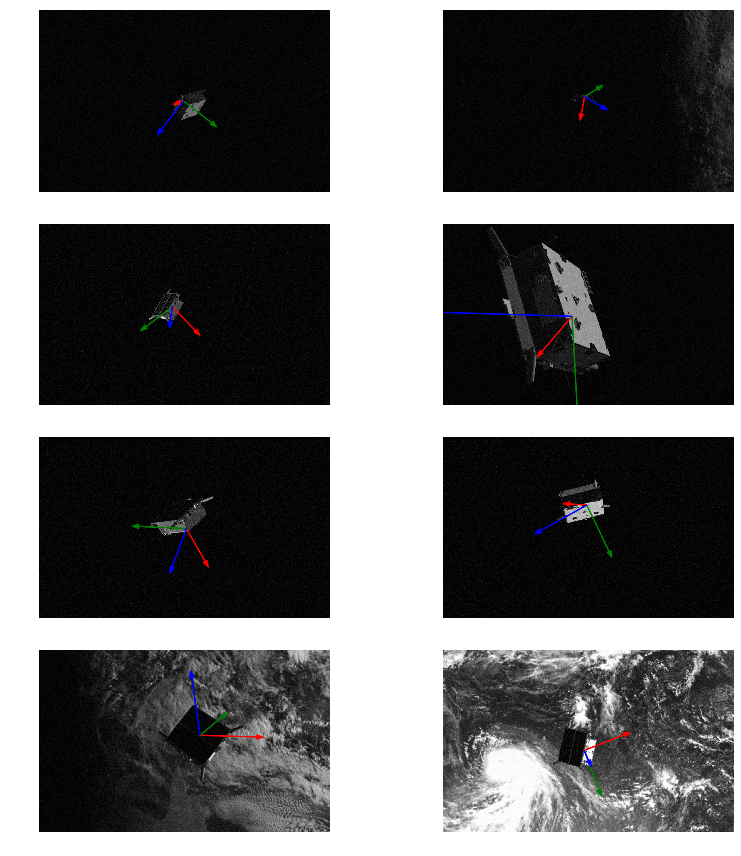

In [6]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        randomdata = get_estimations("submission_submission993.csv")
        dataset.visualize(i=randint(0,12000),partition="test",qr=randomdata["qr"],
                          img_name=randomdata["img_file"],ax=axes[i][j] )
        #dataset.visualize(randint(0,12000), ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout()